In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow.keras import layers

In [2]:
data = r"animals10\raw-img"
class_names = sorted(os.listdir(data))
class_names
for name in class_names:
    print(name,len(os.listdir(data+ "/" +name)))

butterfly 2112
cat 1668
chicken 3098
cow 1866
dog 4863
elephant 1446
horse 2623
sheep 1820
spider 4821
squirrel 1862


In [3]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              zoom_range=0.05,
                              rotation_range=25)

In [4]:
train_data = generator.flow_from_directory( data,
                                            batch_size=32, 
                                            target_size=(224, 224), 
                                            class_mode="categorical", 
                                            shuffle=True, 
                                            subset='training',
                                            seed=42)

test_data = generator.flow_from_directory( data,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="categorical",
                                           shuffle=True,
                                           subset='validation',
                                           seed=42)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [1]:
import tensorflow as tf 
print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())


2.10.0
1:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2:  <function is_built_with_cuda at 0x000001D55EE5F0A0>
3:  /device:GPU:0
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.applications import InceptionV3, InceptionResNetV2, MobileNet, MobileNetV2, DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications import NASNetMobile, NASNetLarge, Xception, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

# Fine-tuning
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Build the model
last = base_model.layers[-2].output
x = GlobalAveragePooling2D()(last)
x = Dense(512, 'relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Print model summary
model.summary()

80134624/80134624 [==============================] - 9s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [14]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)
model_test = history.model
model_test.save('VGG19_transfer_learning_animals10.h5')

Epoch 1/10
655/655 [==============================] - 1152s 2s/step - loss: 1.4483 - accuracy: 0.4877 - val_loss: 0.9441 - val_accuracy: 0.6894
Epoch 2/10
655/655 [==============================] - 1176s 2s/step - loss: 0.8453 - accuracy: 0.7146 - val_loss: 0.7888 - val_accuracy: 0.7506
Epoch 3/10
655/655 [==============================] - 1141s 2s/step - loss: 0.6497 - accuracy: 0.7865 - val_loss: 0.5642 - val_accuracy: 0.8159
Epoch 4/10
655/655 [==============================] - 1046s 2s/step - loss: 0.5405 - accuracy: 0.8247 - val_loss: 0.4619 - val_accuracy: 0.8567
Epoch 5/10
655/655 [==============================] - 1049s 2s/step - loss: 0.4564 - accuracy: 0.8518 - val_loss: 0.5392 - val_accuracy: 0.8349
Epoch 6/10
655/655 [==============================] - 1159s 2s/step - loss: 0.4022 - accuracy: 0.8682 - val_loss: 0.5272 - val_accuracy: 0.8314
Epoch 7/10
655/655 [==============================] - 1353s 2s/step - loss: 0.3658 - accuracy: 0.8819 - val_loss: 0.4475 - val_accuracy:

In [15]:
import keras
loaded_model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')

In [27]:
loaded_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Step 200


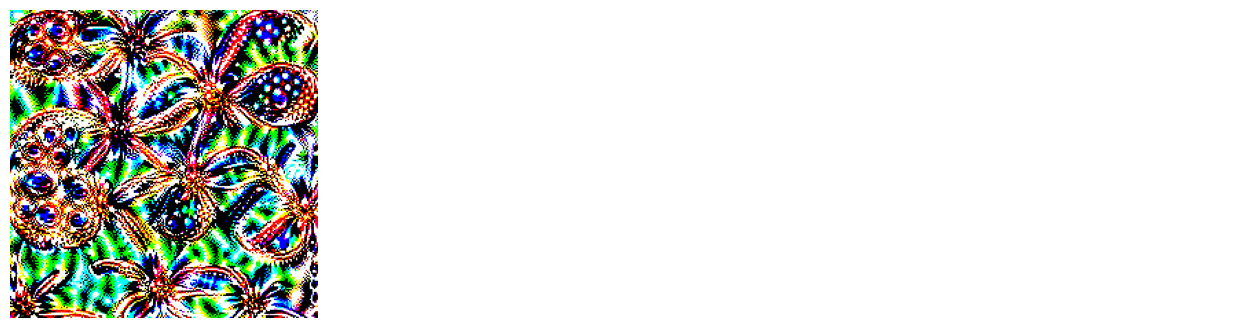

In [26]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render


obj = objectives.Channel(loaded_model, 'block5_conv3',500)
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

Step 200


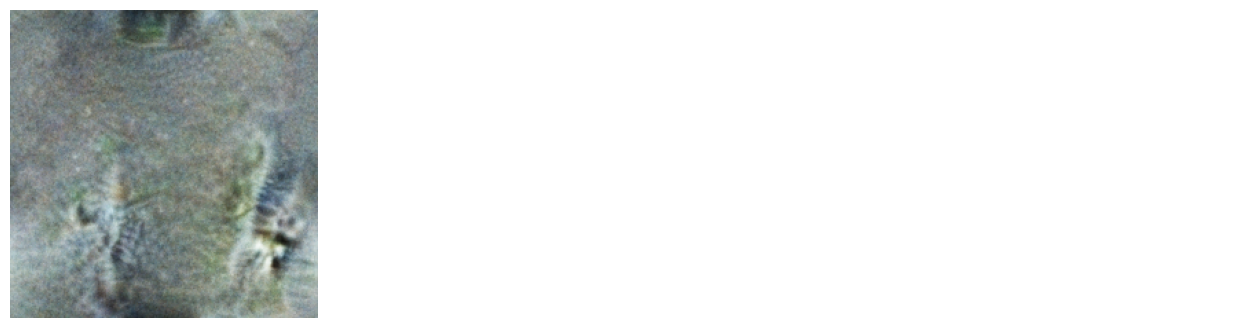

In [31]:
obj = objectives.GramCosSim(loaded_model, 'block5_conv4')
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

Step 200


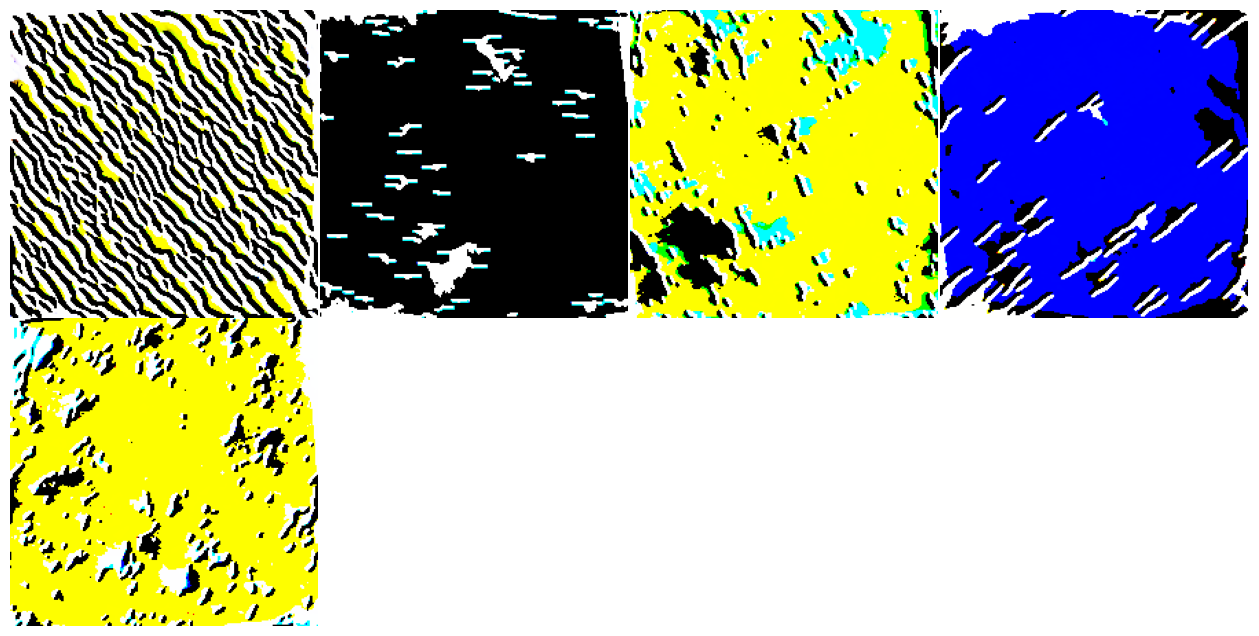

In [24]:
obj = objectives.Channels(loaded_model, 'block1_conv1',[42,43,44,21,55])
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

In [17]:
from PIL import Image
import numpy as np

# Load and resize the image
image = Image.open('elephant2.jpg')
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the pixel values
image_array = image_array / 255.0

# Expand dimensions to match the model input shape
input_image = np.expand_dims(image_array, axis=0)


In [23]:
# Make the prediction
prediction = loaded_model.predict(input_image)
classes_dictionary=train_data.class_indices
# Get the predicted class label
predicted_class = np.argmax(prediction)
animal_name = get_keys_by_value(classes_dictionary, predicted_class)
# Print the predicted class label
print("Predicted class:", animal_name)


1/1 [==============================] - 0s 76ms/step
Predicted class: ['elephant']


In [19]:
def get_keys_by_value(dictionary, value):
    return [key for key, val in dictionary.items() if val == value]



Step 200


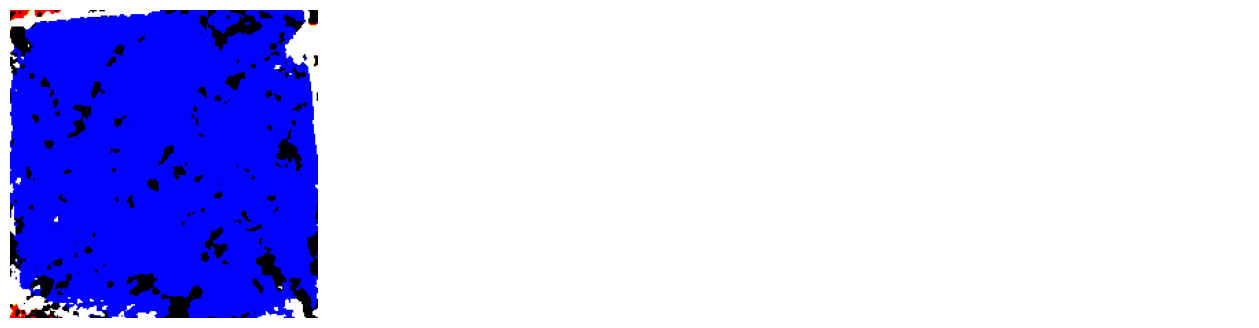

In [38]:
obj = objectives.Channel(model, 'conv1_conv', 3)
_ = render.render_vis(obj, 224)